In [19]:
#!pip install --upgrade azure-cognitiveservices-vision-computervision

In [1]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import TextOperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import TextRecognitionMode
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

import matplotlib.pyplot as plt
from array import array
from PIL import Image
import sys, time, os, json, requests
from io import BytesIO
import requests
from matplotlib.patches import Rectangle
import pandas as pd

In [2]:
subscription_key, endpoint = '8b70ead3443f478bb5a4254d94bd8d2e', 'https://westeurope.api.cognitive.microsoft.com/'
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

In [44]:
image_url = "https://cognitivestoragemsqr.blob.core.windows.net/cognitive-services-ocr/happy_traveler.jpg"
#image_url = "https://cognitivestoragemsqr.blob.core.windows.net/cognitive-services-ocr/Customs-Form.jpg"

(-0.5, 885.5, 1199.5, -0.5)

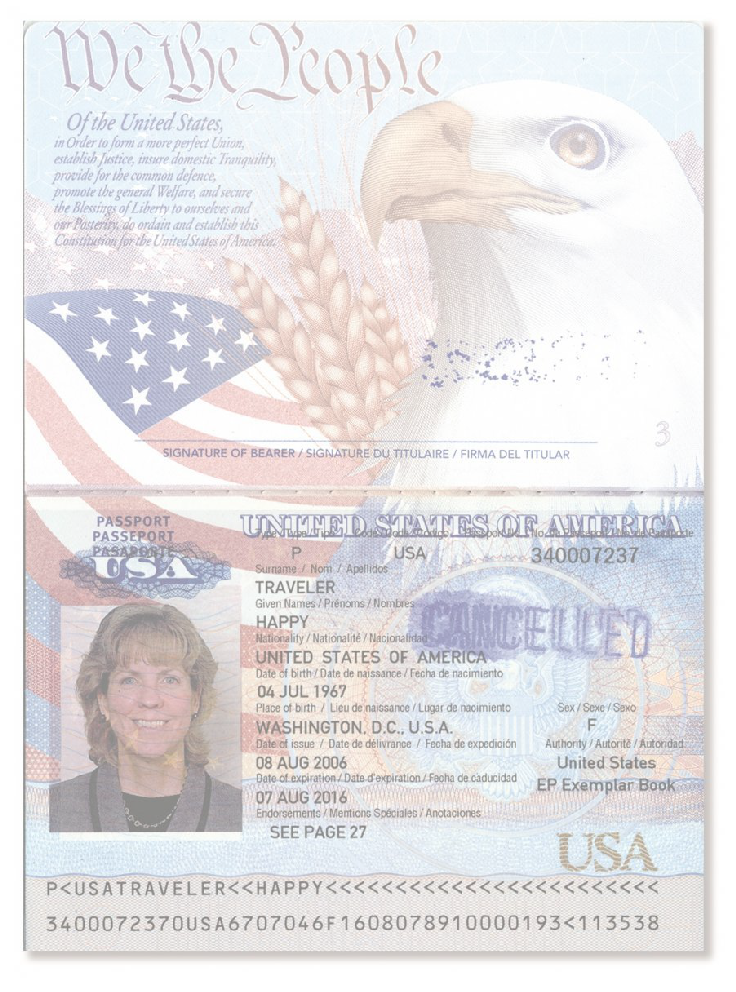

In [45]:
plt.figure(figsize=(17, 18))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
plt.axis("off")

In [46]:
# Call API with URL and raw response (allows you to get the operation location)
recognize_printed_results = computervision_client.batch_read_file(image_url,  raw=True)

# Get the operation location (URL with an ID at the end) from the response
operation_location_remote = recognize_printed_results.headers["Operation-Location"]

# Grab the ID from the URL
operation_id = operation_location_remote.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
while True:
    print(computervision_client.get_read_operation_result(operation_id))
    get_printed_text_results = computervision_client.get_read_operation_result(operation_id)
    if get_printed_text_results.status not in ['NotStarted', 'Running']:
        break
    time.sleep(1)


{'additional_properties': {}, 'status': <TextOperationStatusCodes.not_started: 'NotStarted'>, 'recognition_results': None}
{'additional_properties': {}, 'status': <TextOperationStatusCodes.running: 'Running'>, 'recognition_results': None}
{'additional_properties': {}, 'status': <TextOperationStatusCodes.succeeded: 'Succeeded'>, 'recognition_results': [<azure.cognitiveservices.vision.computervision.models._models_py3.TextRecognitionResult object at 0x7f90795a2710>]}


In [49]:
word_infos = []
if get_printed_text_results.status == TextOperationStatusCodes.succeeded:
    #print("succeeded")
    for text_result in get_printed_text_results.recognition_results:
        #print(text_result)
        for line in text_result.lines:
            
            word_infos.append({"boundingBox": line.bounding_box, "text": line.text } )
            #print(line.text)
            #print(line.bounding_box)

print(json.dumps(word_infos))

[{"boundingBox": [48.0, 7.0, 540.0, 11.0, 540.0, 121.0, 47.0, 117.0], "text": "We the People"}, {"boundingBox": [68.0, 125.0, 268.0, 128.0, 267.0, 158.0, 67.0, 154.0], "text": "Of the United States,"}, {"boundingBox": [55.0, 155.0, 293.0, 158.0, 292.0, 180.0, 54.0, 177.0], "text": "in Order to form a more perfect Union,"}, {"boundingBox": [56.0, 176.0, 331.0, 178.0, 331.0, 199.0, 55.0, 197.0], "text": "establish Justice, insure domestic Tranquility,"}, {"boundingBox": [54.0, 197.0, 269.0, 198.0, 268.0, 218.0, 53.0, 217.0], "text": "provide for the common defence,"}, {"boundingBox": [55.0, 216.0, 302.0, 218.0, 301.0, 238.0, 54.0, 237.0], "text": "promote the general Welfare, and secure"}, {"boundingBox": [52.0, 235.0, 303.0, 238.0, 302.0, 259.0, 51.0, 257.0], "text": "the Blessings of Liberty to ourselves and"}, {"boundingBox": [57.0, 256.0, 310.0, 257.0, 309.0, 278.0, 57.0, 278.0], "text": "our Posterity do ordain and establish this"}, {"boundingBox": [57.0, 276.0, 335.0, 278.0, 334.0,

(-0.5, 885.5, 1199.5, -0.5)

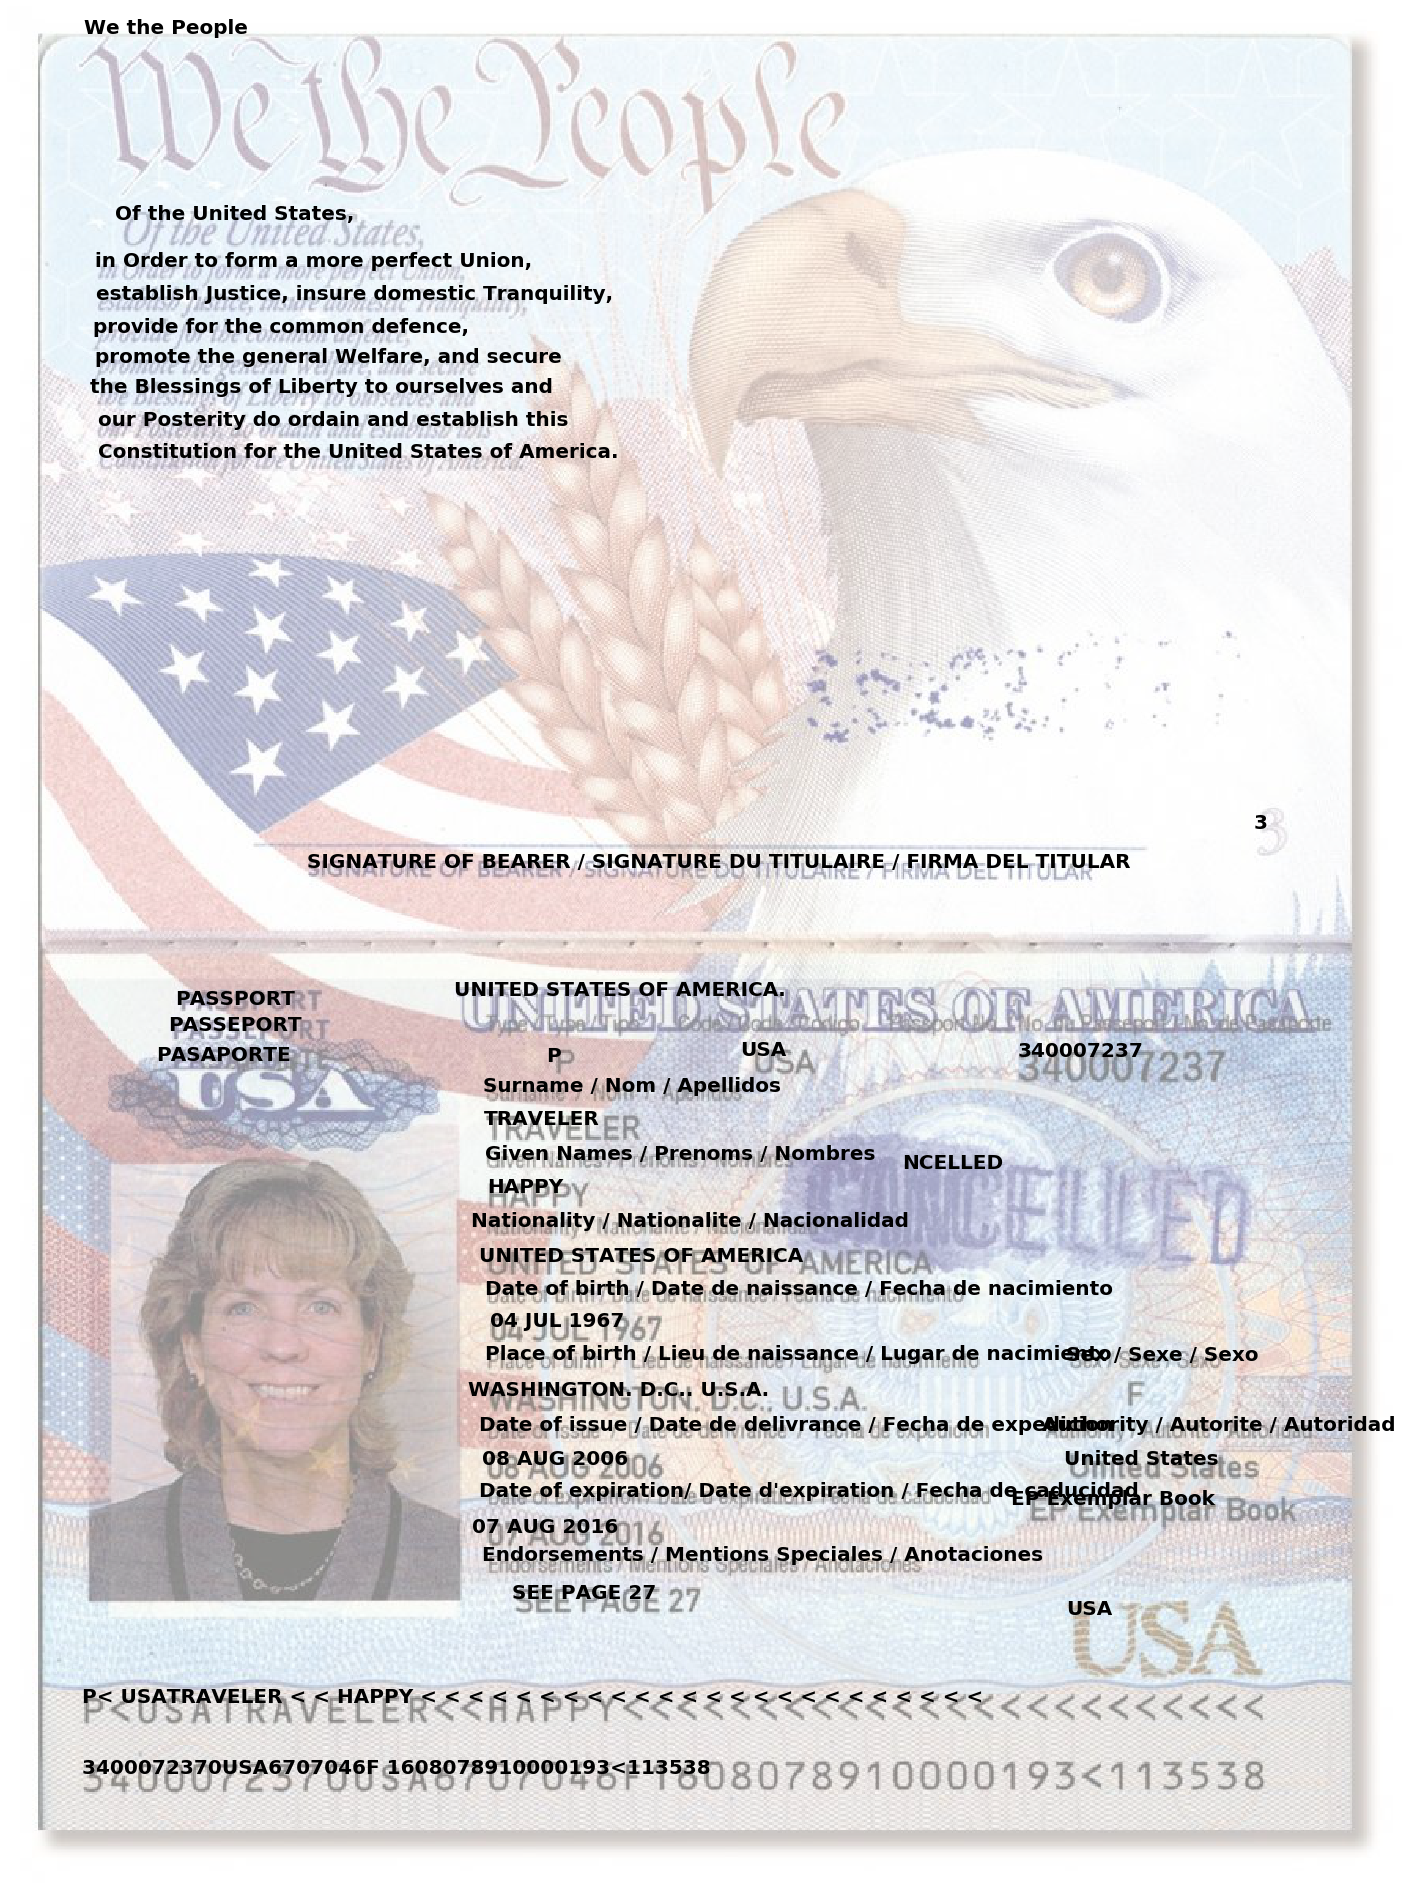

In [50]:
# Display the image and overlay it with the extracted text.
#plt.figure(figsize=(17, 18))
plt.figure(figsize=(25, 50))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"]]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    #patch = Rectangle(origin, bbox[2], bbox[3],
      #                fill=False, linewidth=2, color='y')
    #ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
plt.axis("off")

In [51]:
last1 =  get_printed_text_results.recognition_results[0].lines[-2].text
last2 = get_printed_text_results.recognition_results[0].lines[-1].text
 
import pandas as pd
 
def parse_pass(line1, line2):
  
  line1, line2 = line1.replace(" ", ""), line2.replace(" ", "")
  print(line1)
  print(line2)
 
  p = line1[0] #index 1
  ptype = line1[1] #index 2
  if ptype  ==  '<':
    ptype = ""
 
  cntry = line1[2:5].partition("<")[0]  #indecies 3 to 5
 
  names = line1[5:44] #indecies 6 to 44
  surname = names.partition("<")[0]
  given_names_p = list(names[len(surname) + 2:].split("<"))
  given_names = []
  for name in given_names_p:
    if len(name) != 0:
      given_names.append(name)
 

  passnum = line2[0:9].partition("<")[0] #1-9
  check_digit1_9 = line2[9] #10
 
  nationality =  line2[10:13].partition("<")[0] #11-13
 
  DOB = line2[13:19] #14-19
  check_digit14_19 = line2[19] #20
 
  sex = line2[20] #21
 
  exp = line2[21:27] #22-27
  check_digit22_27 = line2[27] #28
 
  prsnl_num  = line2[28:42].partition("<")[0] #29-42
  check_digit29_42 = line2[42] #43
 
  check_check_digit =  line2[43] #44
 
  data = { 'Passport' : [p],
          'Type': [ptype], 
          'Issuing Country': [cntry], 
          'Surname': [surname], 
          'Given names': [given_names], 
          'Passport Number': [passnum], 
          'Passport Number check digit': [check_digit1_9], 
          'Nationality': [nationality],  
          'DOB': [DOB], 
          'DOB check digit': [check_digit14_19], 
          'sex': [sex], 
          'Expiration Date': [exp], 
          'Expiration Date check digit': [check_digit22_27], 
          'Personal Number': [prsnl_num], 
          'Personal Number check digit': [check_digit29_42], 
          'Check Digit check digit': [check_check_digit]
  }
 
  df = pd.DataFrame(data)
  return df
 
df1 = parse_pass(last1, last2)
df2 = parse_pass('P<CANJACKSONS<<JACKY<BOB<TOM<<<<<<<<<<<<<<<<','3400072370CAN6707046M1608078910000193<113538')
 
df3 = df1.append(df2, ignore_index = True)
df3

P<USATRAVELER<<HAPPY<<<<<<<<<<<<<<<<<<<<<<<<
3400072370USA6707046F1608078910000193<113538
P<CANJACKSONS<<JACKY<BOB<TOM<<<<<<<<<<<<<<<<
3400072370CAN6707046M1608078910000193<113538


Passport Type Issuing Country   Surname        Given names Passport Number  \
0        P                  USA  TRAVELER            [HAPPY]       340007237   
1        P                  CAN  JACKSONS  [JACKY, BOB, TOM]       340007237   

  Passport Number check digit Nationality     DOB DOB check digit sex  \
0                           0         USA  670704               6   F   
1                           0         CAN  670704               6   M   

  Expiration Date Expiration Date check digit Personal Number  \
0          160807                           8       910000193   
1          160807                           8       910000193   

  Personal Number check digit Check Digit check digit  
0                           3                       8  
1                           3                       8